# Introduction

This notebook runs through a simple analysis example - determining the tax impact of removing the Personal Allowance and adding a UBI in the UK.

## Context

The Personal Allowance is the initial tax-free band for income tax in the UK. Under the current marginal tax rates, the first £12,500 of a person's taxable income is not taxed. The Personal Allowance is reduced by £1 for every £2 of taxable income over £100,000.

First, import packages.

In [1]:
import pandas as pd
from openfisca_uk import CountryTaxBenefitSystem
from openfisca_core.simulation_builder import SimulationBuilder
from openfisca_uk.reforms.basic_income import bi_from_pa
from utilities.simulation import model
from utilities.visualisation import banded_lineplot
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Next, create the OpenFisca models. The ```bi_from_pa``` reform removes the personal allowance (by shifting all tax brackets down) and adds a UBI of £12,500 per year.

In [2]:
data = pd.read_csv('../datasets/frs/frs.csv')
period = '2020-01'
baseline_model = model(data=data, period=period)
reform_model = model(bi_from_pa, data=data, period=period)

Convert the pre-tax income, baseline post-tax income and reformed post-tax income to yearly amounts. 

In [3]:
data['net_income'] = baseline_model.calculate('net_income', period) * 12
data['net_income_reformed'] = reform_model.calculate('net_income', period) * 12
data['total_income'] *= 12

Plot the results.

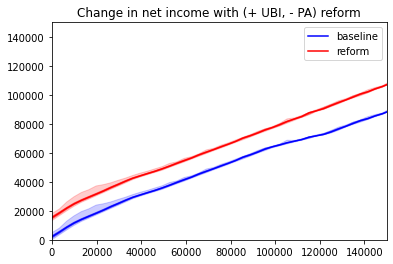

In [5]:
plot = banded_lineplot(data['total_income'], data['net_income'])
plot = banded_lineplot(data['total_income'], data['net_income_reformed'], color='red')
plot.set(xlim=[0, 150000])
plot.set(ylim=[0, 150000])
plt.legend(labels=['baseline', 'reform'])
plot.set_title('Change in net income with (+ UBI, - PA) reform')
plt.show()